In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="whitegrid")

In [18]:
import os
os.listdir()

['.config', 'ifood_df.csv', '.ipynb_checkpoints', 'sample_data']

In [2]:
import pandas as pd

df = pd.read_csv("ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2205.0,51622.094785,20713.063826,1730.0,35196.0,51287.0,68281.0,113734.0
Kidhome,2205.0,0.442177,0.537132,0.0,0.0,0.0,1.0,2.0
Teenhome,2205.0,0.506576,0.544380,0.0,0.0,0.0,1.0,2.0
Recency,2205.0,49.009070,28.932111,0.0,24.0,49.0,74.0,99.0
MntWines,2205.0,306.164626,337.493839,0.0,24.0,178.0,507.0,1493.0
MntFruits,2205.0,26.403175,39.784484,0.0,2.0,8.0,33.0,199.0
MntMeatProducts,2205.0,165.312018,217.784507,0.0,16.0,68.0,232.0,1725.0
MntFishProducts,2205.0,37.756463,54.824635,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2205.0,27.128345,41.130468,0.0,1.0,8.0,34.0,262.0
MntGoldProds,2205.0,44.057143,51.736211,0.0,9.0,25.0,56.0,321.0


In [9]:
df.columns.tolist()

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Customer_Days',
 'marital_Divorced',
 'marital_Married',
 'marital_Single',
 'marital_Together',
 'marital_Widow',
 'education_2n Cycle',
 'education_Basic',
 'education_Graduation',
 'education_Master',
 'education_PhD',
 'MntTotal',
 'MntRegularProds',
 'AcceptedCmpOverall']

In [11]:
df["Family_Size"] = df["Kidhome"] + df["Teenhome"] + 1

In [12]:
spend_cols = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

df["Total_Spending"] = df[spend_cols].sum(axis=1)

In [13]:
campaign_cols = [
    "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3",
    "AcceptedCmp4", "AcceptedCmp5"
]

df["Campaign_Response_Count"] = df[campaign_cols].sum(axis=1)

In [14]:
features = [
    "Income",
    "Family_Size",
    "Total_Spending",
    "Campaign_Response_Count",
    "Recency"
]

In [15]:
cluster_df = df[features].dropna()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df = df.loc[cluster_df.index]
df["Cluster"] = clusters

In [17]:
cluster_summary = df.groupby("Cluster")[features].mean()
cluster_summary

,Income,Family_Size,Total_Spending,Campaign_Response_Count,Recency
Cluster,,,,,
0,39610.196023,2.169034,232.453125,0.123580,22.465909
1,40235.274725,2.314560,230.782967,0.092033,73.600275
2,71937.932917,1.422777,1250.427457,0.274571,50.249610
3,79830.651515,1.310606,1551.977273,2.500000,48.924242


In [20]:
# IMPORTS
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="whitegrid")

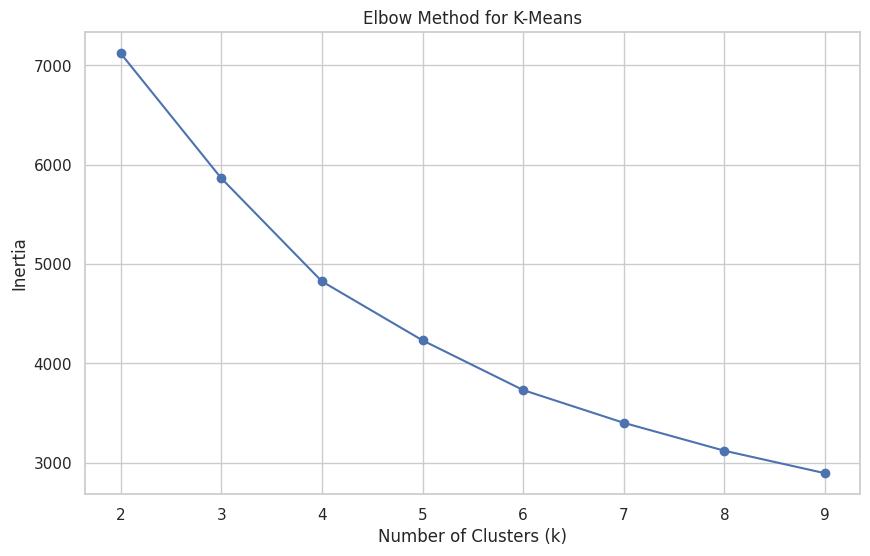

In [22]:
inertia = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df = df.loc[cluster_df.index].copy()
df["Cluster"] = clusters

df["Cluster"].value_counts().sort_index()

,count
Cluster,
0,704
1,728
2,641
3,132


In [24]:
cluster_summary = df.groupby("Cluster")[features].mean()
cluster_summary

,Income,Family_Size,Total_Spending,Campaign_Response_Count,Recency
Cluster,,,,,
0,39610.196023,2.169034,232.453125,0.123580,22.465909
1,40235.274725,2.314560,230.782967,0.092033,73.600275
2,71937.932917,1.422777,1250.427457,0.274571,50.249610
3,79830.651515,1.310606,1551.977273,2.500000,48.924242


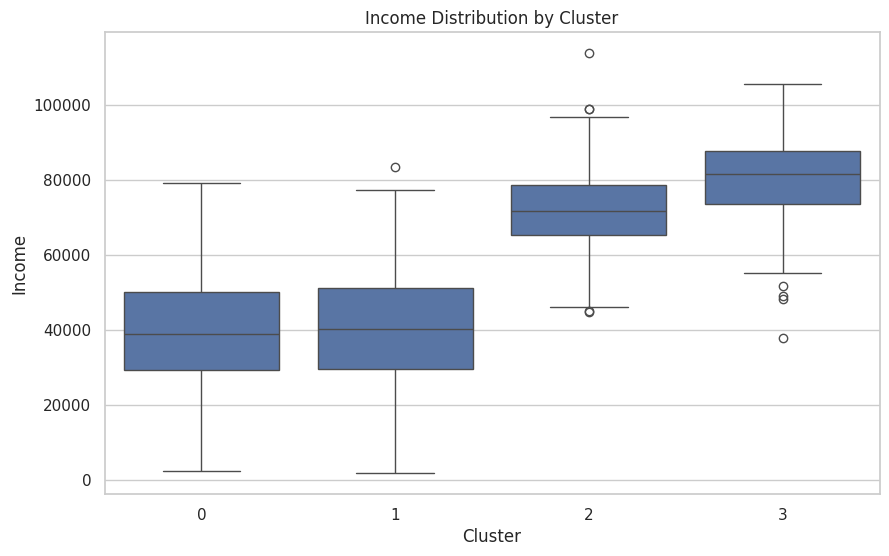

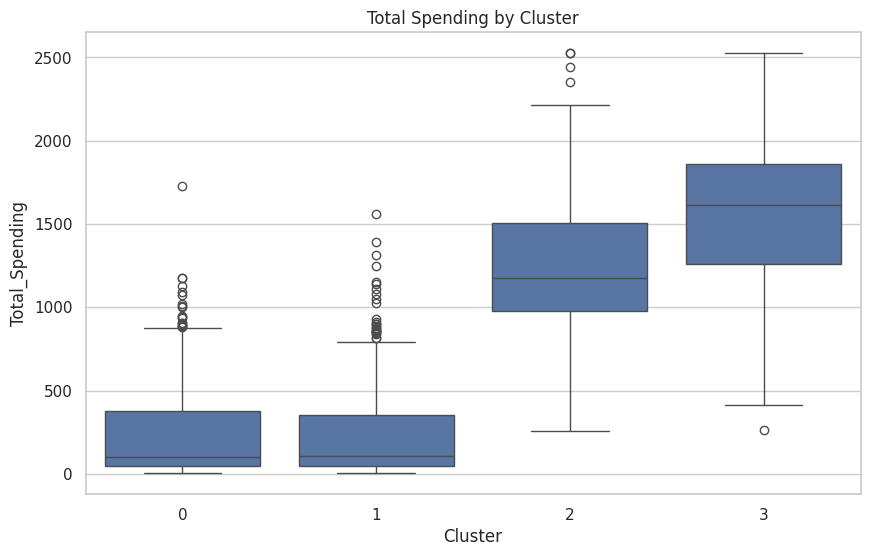

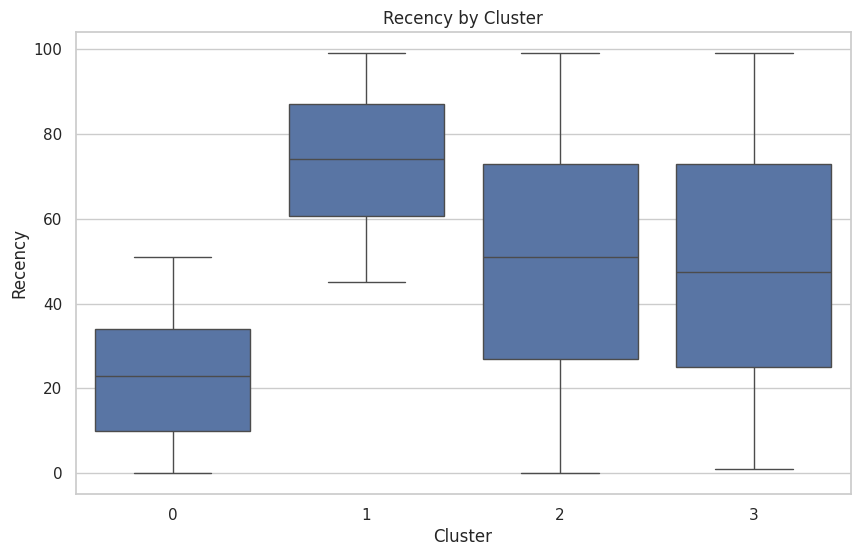

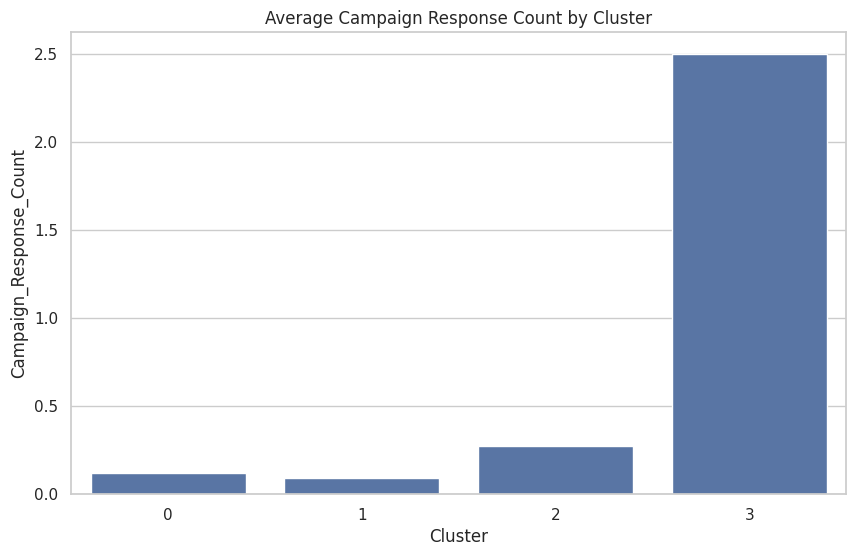

In [25]:
#Income distribution
sns.boxplot(data=df, x="Cluster", y="Income")
plt.title("Income Distribution by Cluster")
plt.show()

# Total spending distribution
sns.boxplot(data=df, x="Cluster", y="Total_Spending")
plt.title("Total Spending by Cluster")
plt.show()

# Recency by cluster
sns.boxplot(data=df, x="Cluster", y="Recency")
plt.title("Recency by Cluster")
plt.show()

# Campaign response by cluster
sns.barplot(
    data=df.groupby("Cluster")["Campaign_Response_Count"].mean().reset_index(),
    x="Cluster",
    y="Campaign_Response_Count"
)
plt.title("Average Campaign Response Count by Cluster")
plt.show()

In [26]:
# Average spend per product
avg_spend_products = df[spend_cols].mean()
avg_spend_products

# Simple churn proxy (Recency > 90 days)
churn_flag = df["Recency"] > 90
churn_rate = churn_flag.mean() * 100
churn_rate

np.float64(8.75283446712018)

In [27]:
cluster_metrics = df.groupby("Cluster").agg(
    Avg_Income=("Income", "mean"),
    Avg_Family_Size=("Family_Size", "mean"),
    Avg_Total_Spending=("Total_Spending", "mean"),
    Avg_Recency=("Recency", "mean"),
    Avg_Campaign_Response=("Campaign_Response_Count", "mean"),
    Customer_Count=("Cluster", "count")
)

cluster_metrics

,Avg_Income,Avg_Family_Size,Avg_Total_Spending,Avg_Recency,Avg_Campaign_Response,Customer_Count
Cluster,,,,,,
0,39610.196023,2.169034,232.453125,22.465909,0.123580,704
1,40235.274725,2.314560,230.782967,73.600275,0.092033,728
2,71937.932917,1.422777,1250.427457,50.249610,0.274571,641
3,79830.651515,1.310606,1551.977273,48.924242,2.500000,132
